# Height and Weight

### Introduction
The relationship between height and weight is a fundamental aspect of human biology and health. Understanding how these two variables correlate can provide insights into various aspects of health, including growth patterns, nutritional status, and the risk of developing certain health conditions. This project aims to analyze the relationship between height and weight using statistical and machine learning techniques to develop predictive models. These models can estimate weight based on height, providing valuable tools for health professionals and researchers.


### Real-World Implementation

In real-world scenarios, understanding the height-weight relationship is crucial for several domains:

Healthcare: Physicians use height and weight measurements to calculate Body Mass Index (BMI), which is a key indicator of obesity and undernutrition. Accurate prediction models can help in assessing growth in children, diagnosing health conditions, and tailoring personalized healthcare plans.

Nutrition: Dietitians use height and weight to develop individualized diet plans. Predictive models can aid in recommending caloric intake and nutritional requirements based on an individual's height.

Fitness and Wellness: Fitness professionals utilize height and weight data to create customized fitness programs. Predictive tools can enhance these programs by providing more precise assessments of an individual's health and fitness needs.

### Conclusion

By analyzing the relationship between height and weight, this project aims to develop accurate predictive models that can be applied in various domains such as healthcare, nutrition, and public health. Utilizing powerful tools and libraries, the project will provide valuable insights and practical solutions to enhance health assessments and interventions.

In [1]:
import os
os.getcwd()

'/Users/sainandaviharim/Desktop/Files/Python Projects/ML Projects/Height and Weight'

In [2]:
#importing eda libraries
import numpy as np  #math
import pandas as pd #excellent for data manuplation

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing 
from sklearn.preprocessing import StandardScaler

#spliting the data
from sklearn.model_selection import train_test_split

# importing Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#evalution matrics
from sklearn.metrics import mean_squared_error

In [3]:
data=pd.read_csv(r'/Users/sainandaviharim/Desktop/Files/Python Projects/ML Projects/Height and Weight/SOCR-HeightWeight.csv')
data.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [4]:
data['Weight(kgs)']=data['Weight(Pounds)']*0.453592
data['Height(Feet)']=data['Height(Inches)'] // 12 + (data['Height(Inches)'] % 12) / 10

In [5]:
data.columns

Index(['Index', 'Height(Inches)', 'Weight(Pounds)', 'Weight(kgs)',
       'Height(Feet)'],
      dtype='object')

In [6]:
data.drop(columns=['Index','Height(Inches)','Weight(Pounds)'],axis=1,inplace=True)
data.head()


,Weight(kgs),Height(Feet)
0,51.252494,5.578331
1,61.909547,6.151521
2,69.411778,5.939874
3,64.562199,5.821660
4,65.452010,5.778781


In [7]:
data.describe()

,Weight(kgs),Height(Feet)
count,25000.000000,25000.000000
mean,57.642209,5.795967
std,5.289290,0.183513
min,35.386871,5.027836
25%,54.117461,5.670440
50%,57.677738,5.799570
75%,61.186318,5.927296
max,77.529759,6.315280


In [8]:
# checking null values 
data.isna().any()

Weight(kgs)     False
Height(Feet)    False
dtype: bool

In [9]:
# checking the type of features of the data
data.dtypes

Weight(kgs)     float64
Height(Feet)    float64
dtype: object

<Axes: >

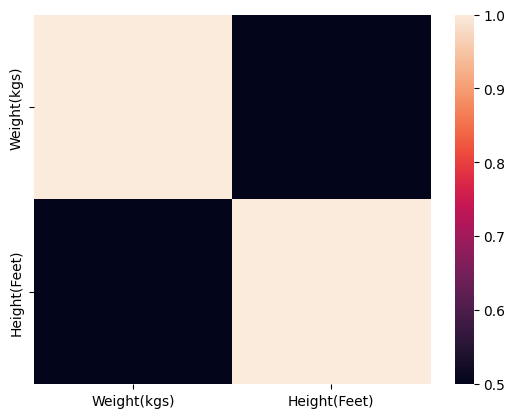

In [10]:
sns.heatmap(data.corr())

<Axes: xlabel='Height(Feet)'>

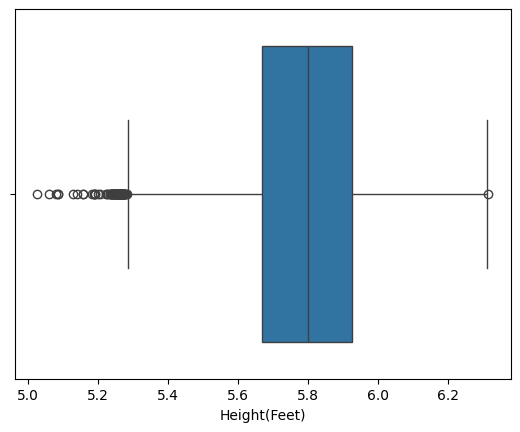

In [11]:
# checking outliers
sns.boxplot(x=data['Height(Feet)'])

<Axes: xlabel='Weight(kgs)'>

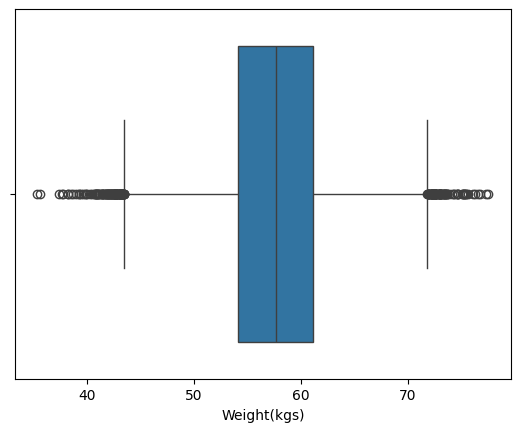

In [12]:
sns.boxplot(x=data['Weight(kgs)'])

Text(0.5, 1.0, 'Height vs Weight')

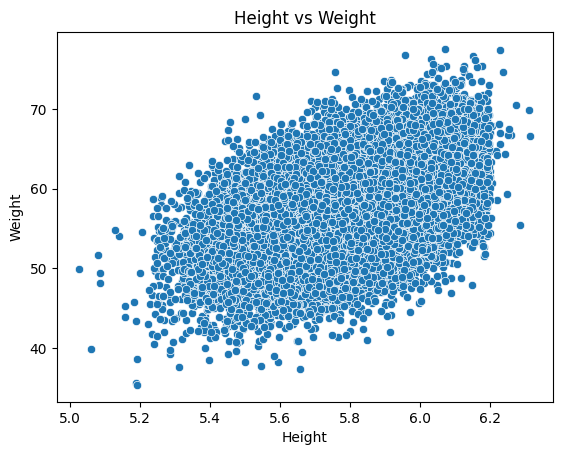

In [13]:
sns.scatterplot(x=data['Height(Feet)'],y=data['Weight(kgs)'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')

In [14]:
data.sample(3)

,Weight(kgs),Height(Feet)
187,54.850340,5.659347
20320,63.782792,6.010587
2507,52.916043,5.643905


In [15]:
# splitting the data into dependent and independent variable
x=data.iloc[:,1]
y=data.iloc[:,0]

In [16]:
# applying scalling techniques

sc=StandardScaler()
x=sc.fit_transform(x.values.reshape(-1,1))
y=sc.fit_transform(y.values.reshape(-1,1))

In [17]:
# splitting the data 
x_train, x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [18]:
print('Shape of trining data')
print(x_train.shape)
print(y_train.shape)

print('Shpae of testing data')
print(x_test.shape)
print(y_test.shape)

Shape of trining data
(20000, 1)
(20000, 1)
Shpae of testing data
(5000, 1)
(5000, 1)


In [19]:
#linear regression model X should be 2d array so we are reshaping it to 2d array

# Reshape training data
x_train_2d = x_train.reshape(-1, 1)
y_train_2d = y_train.reshape(-1, 1)

# Reshape testing data
x_test_2d = x_test.reshape(-1, 1)
y_test_2d = y_test.reshape(-1, 1)

print("Shape of training data (X):", x_train_2d.shape)
print("Shape of training data (y):", y_train_2d.shape)
print("Shape of testing data (X):", x_test_2d.shape)
print("Shape of testing data (y):", y_test_2d.shape)

Shape of training data (X): (20000, 1)
Shape of training data (y): (20000, 1)
Shape of testing data (X): (5000, 1)
Shape of testing data (y): (5000, 1)


In [20]:
lr=LinearRegression()
lr.fit(x_train_2d,y_train_2d)


LinearRegression()

In [21]:
y_pred=lr.predict(x_test_2d)

In [22]:
mse=mean_squared_error(y_pred,y_test_2d)
print(mse)

0.7755833253717815


In [23]:
dt=DecisionTreeRegressor()
dt.fit(x_train_2d,y_train_2d)

DecisionTreeRegressor()

In [24]:
y_pred2=dt.predict(x_test_2d)

In [25]:
mse2=mean_squared_error(y_pred2,y_test_2d)
print(mse2)

1.4869976560521159


In [26]:
rf=RandomForestRegressor()
rf.fit(x_train_2d,y_train_2d)

/Users/sainandaviharim/.pyenv/versions/3.10.16/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [27]:
y_pred3=rf.predict(x_test_2d)

In [28]:
mse3=mean_squared_error(y_pred3,y_test_2d)
print(mse3)

1.1128774233504632


In [29]:
# model tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}
grid_search=GridSearchCV(model1,param_grid,cv=5,scoring='neg_mean_squared_error')

grid_search.fit(x_train_2d,y_train_2d)

print("Best perameters:",grid_search.best_params_)
print("Best MSE score :",grid_search.best_score_)

Best perameters: {'copy_X': True, 'fit_intercept': False}
Best MSE score : -0.7447394395161517


In [30]:
from sklearn.model_selection import cross_val_score

model1=LinearRegression()

acc_scores=cross_val_score(model1,x_train_2d,y_train_2d,cv=10, scoring='neg_mean_squared_error')

mse_scores=-acc_scores

print("MSE Scores:",mse_scores)

MSE Scores: [0.77403942 0.77919865 0.72673395 0.75826452 0.78093903 0.73190806
 0.72860876 0.73115804 0.76681234 0.67061663]


In [31]:
# Final model

model_final=LinearRegression(copy_X= True, fit_intercept= False)
model_final.fit(x_train_2d,y_train_2d)


LinearRegression(fit_intercept=False)

In [32]:
# Convert to pickle file

In [33]:
import pickle
file_name='model_final.pkl'

with open(file_name,'wb') as file:
    pickle.dump(file_name,file)

